## 6.1 Credit Risk Scoring

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
# there are a variety of data elements that have been manipulated.  refer to the R code in the data source at:
# https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R for details

df.status = df.status.map({1: 'ok', 2: 'default', 0: 'unk'})  # R code shows these as "good" and "bad" respectively

In [5]:
#alternative means to code the map function used below for remaining categorical variables
marital_vals = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
home_vals = {
    1: 'rent',
    2: 'owner',
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
records_vals = {
    1: 'no_rec',
    2: 'yes_rec',
    0: 'unk'
}
job_vals = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.marital = df.marital.map(marital_vals)
df.home = df.home.map(home_vals)
df.records = df.records.map(records_vals)
df.job = df.job.map(job_vals)

df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [6]:
# missing data (in income, assets, and debt) was coded as '9999999'.  need to mitigate those
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan).max()

In [7]:
#there are also very few rows of 'Unknowns'.  Based on extremely limited number, lets get rid of them
df = df[df.status != 'unk'].reset_index(drop=True)  #there is a grand total of 7 other records in other columns...not sure why we're not eliminating those

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# this creates binary vectors (0/1) for easier classification in our target variable
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [12]:
del df_train['status']
del df_test['status']
del df_val['status']

In [13]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no_rec,freelance,75,959.0,300000.0,30000.0,1000,1400
1,6,parents,48,32,single,yes_rec,fixed,35,959.0,300000.0,30000.0,1100,1330
2,1,parents,48,40,married,no_rec,fixed,75,959.0,300000.0,30000.0,1320,1600
3,1,parents,48,23,single,no_rec,partime,35,959.0,300000.0,30000.0,1078,1079
4,5,owner,36,46,married,no_rec,freelance,60,959.0,300000.0,30000.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,priv,36,45,married,no_rec,fixed,45,959.0,300000.0,30000.0,800,1600
2668,7,priv,60,29,married,no_rec,fixed,60,959.0,300000.0,30000.0,1000,1290
2669,1,parents,24,19,single,no_rec,fixed,35,959.0,300000.0,30000.0,400,600
2670,15,owner,48,43,married,no_rec,freelance,60,959.0,300000.0,30000.0,2500,2976


## 6.3 Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer # for our categorical variables...
from sklearn.metrics import roc_auc_score

In [15]:
train_dicts = df_train.fillna(0).to_dict(orient = 'records')

In [16]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [19]:
y_pred = dt.predict_proba(X_val)[:,1]

In [20]:
roc_auc_score(y_val, y_pred)

0.6347569688309801

In [21]:
#what about if we look at the training dataset?
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

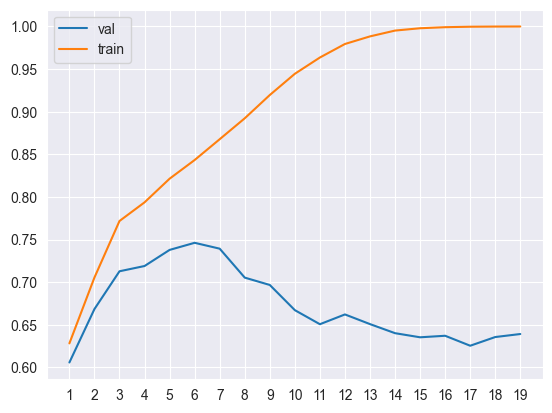

In [22]:
# the AUC of 1.0 on this indicates that we've over-fitted the decision tree.  It is essentially so well dialed in to the training data that it is unable
# to generalize and be applied usefully to data that may be different...which makes it not very useful as a classifier
# multiple methods to deal with this.  One is controlling how deep (how specific) the tree can go down - i.e. limiting how many levels

val_score = []
train_score = []
for c in list(np.arange(1,20)):
    dt = DecisionTreeClassifier(max_depth = c)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    val_score.append(roc_auc_score(y_val, y_pred))
    y_pred = dt.predict_proba(X_train)[:,1]
    train_score.append(roc_auc_score(y_train, y_pred))

plt.plot(np.arange(1,20), val_score, label = 'val')
plt.plot(np.arange(1,20), train_score, label = 'train')
plt.xticks(np.arange(1,20))
plt.legend()

In [23]:
#you can dig into the details of the tree to see what's going on!
from sklearn.tree import export_text
#skinny down the tree to make this easier to read
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

#take a look at the tree...this presents as coded "features"
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0



In [24]:
print(export_text(dt, feature_names = dv.get_feature_names_out()))  #this presents the same tree but using actual field names

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



## 6.4 Decision Tree learning algorithm

In [26]:
# some exemplars to dig into the logic

data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]
df_example = pd.DataFrame(data, columns = ['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [27]:
# logic is essentially looking to maximize "correct" answers based on a single comparison/threshold of asssets.  so what is best value?
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [28]:
Ts = [2000,3000,4000,5000,8000]  #defining some arbitrary thresholds to then test against

In [29]:
# see the video for the remaining details.  However, this essentially creates a table with compared accuracy of these thresholds, with
# 'default' to the left and 'ok' to the right, comparing at each threshold how accurate each of these "single-node decision trees" would
# be and then selecting the lowest average (average of accuracy for each branch).  Ts = 3000 ends up being the best, with a ~10% overall average accuracy

for t in Ts:
    df_left = df_example[df_example.assets <= t]
    df_right = df_example[df_example.assets > t]

    display(df_left)
    display(df_right)

    print(t)


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


2000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


3000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


4000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok


5000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


8000


In [30]:
# additional depth to our data to add a second feature (debt) and examine the impact there

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default']
]
df_example = pd.DataFrame(data, columns = ['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [31]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [34]:
thresholds = {
    'assets': [2000,3000,4000,5000,8000],
    'debt': [500, 1000, 2000]
}

for feature, Ts in thresholds.items():
    for T in Ts:
        print('######################')
        print(feature)
        print (T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize = True))
        display(df_right)
        print(df_right.status.value_counts(normalize = True))

        print()
        print('######################')



######################
assets
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

######################
######################
assets
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

######################
######################
assets
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

######################
######################
assets
5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

######################
######################
assets
8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

######################
######################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

######################
######################
debt
1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

######################
######################
debt
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

######################


**Decision Tree Learning Algorithm**
* Find the best split
* Stop if max_depth is reached
* If left is sufficiently large and not pure
* * Repeat for left
* Ditto for right

## 6.5 Decision Tree Parameter Tuning

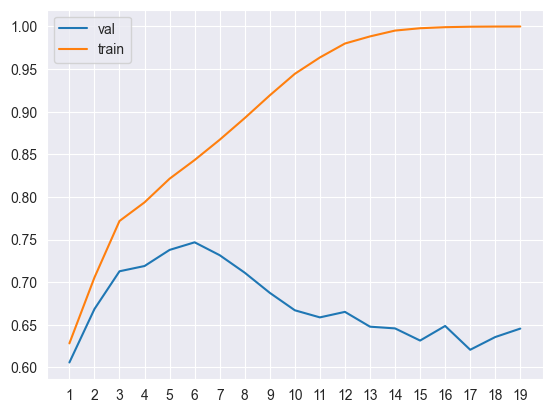

In [35]:
# max_depth is the first target, and class effectively pursues the same type of iterative exploration of different depths that I did earlier
# reproducing that code here just for ease of following along

val_score = []
train_score = []
for c in list(np.arange(1,20)):
    dt = DecisionTreeClassifier(max_depth = c)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    val_score.append(roc_auc_score(y_val, y_pred))
    y_pred = dt.predict_proba(X_train)[:,1]
    train_score.append(roc_auc_score(y_train, y_pred))

plt.plot(np.arange(1,20), val_score, label = 'val')
plt.plot(np.arange(1,20), train_score, label = 'train')
plt.xticks(np.arange(1,20))
plt.legend()

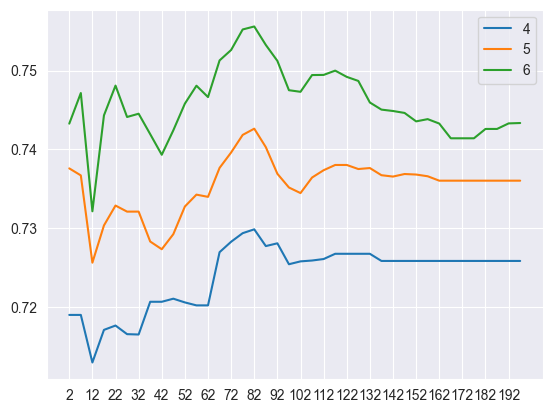

In [42]:
#lets now expand further and examine best settings for 'min_samples_leaf', but limit to the best depths (4 - 6)

val_score = []
scores = []
for d in [4, 5, 6]:
    for c in list(np.arange(2,200,5)):
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf=c)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        val_score.append(roc_auc_score(y_val, y_pred))
        scores.append((d, c, roc_auc_score(y_val, y_pred)))
    plt.plot(np.arange(2,200,5),val_score, label = d)
    plt.xticks(np.arange(2,200,10))
    plt.legend()
    val_score = []

In [43]:
df_scores = pd.DataFrame(scores, columns = ['depth', 'min_leaf', 'auc'])
df_scores.head()

,depth,min_leaf,auc
0,4,2,0.718991
1,4,7,0.718991
2,4,12,0.712958
3,4,17,0.717093
4,4,22,0.717644


In [46]:
df_scores_pivot = df_scores.pivot(index='min_leaf', columns=['depth'], values=['auc'])
df_scores_pivot.head().round(3)

auc              
depth         4      5      6
min_leaf                     
2         0.719  0.738  0.743
7         0.719  0.737  0.747
12        0.713  0.726  0.732
17        0.717  0.730  0.744
22        0.718  0.733  0.748

<Axes: xlabel='None-depth', ylabel='min_leaf'>

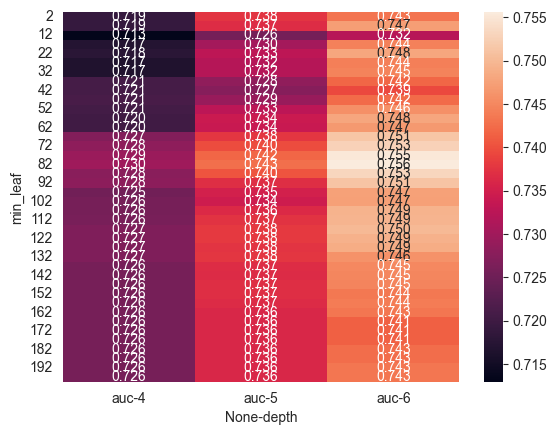

In [47]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [48]:
#now ready select/train the final Decision Tree, since best set of parameters has been identified
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 82)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,82
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 6.6 Random Forests!

In [49]:
# RF is effectively a collection of different decision trees.  Rather than the same features, each "tree" selects different sets of features,
# trained with potentially different parameters, which then produces different outcomes.  Those results are then aggregated and leveraged to
# provide a (hopefully) more accurate prediction.  Key is that features are selected randomly - hence "Random Forest"

from sklearn.ensemble import RandomForestClassifier


In [54]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [56]:
roc_auc_score(y_val,y_pred)

0.7367979705020464

In [58]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))


In [59]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])

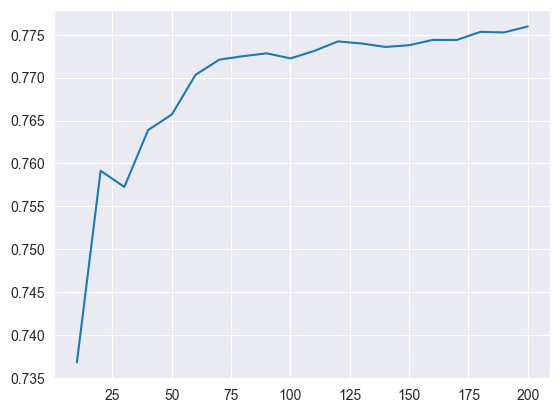

In [60]:
plt.plot(df_scores.n_estimators, df_scores.auc, label = 'RandomForest')

In [61]:
# parameters similar to DecisionTrees are useful to tune, since this is just a forest of different trees...
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [62]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'auc'])

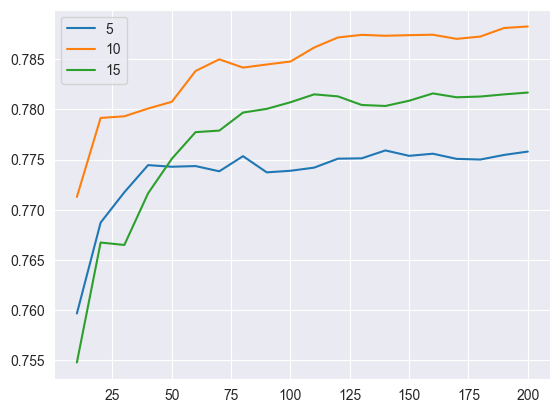

In [63]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = d)

plt.legend()

In [64]:
max_depth = 10

In [65]:
# now for min_leaf...
scores = []

for s in [5, 15, 25, 50, 75, 80]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators = n, max_depth = max_depth, min_samples_leaf=s, random_state = 1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

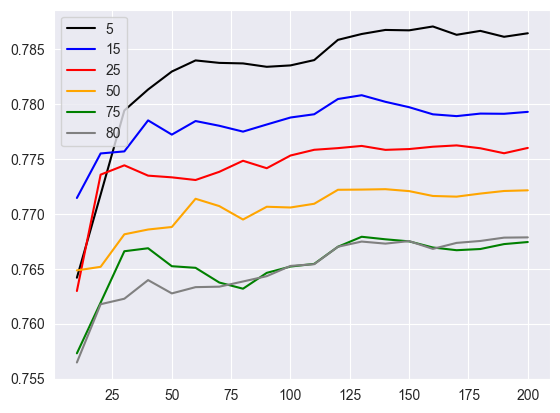

In [67]:
df_scores = pd.DataFrame(scores, columns = ['min_samples_leaf', 'n_estimators', 'auc'])
colors = ['black', 'blue', 'red', 'orange', 'green', 'grey']
min_samples_leaf_vals = [5, 15, 25, 50, 75, 80]

for s, col in zip(min_samples_leaf_vals, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = s, color = col)

plt.legend()

In [68]:
min_samples_leaf = 5

In [69]:
rf = RandomForestClassifier(n_estimators = 125, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state = 1)
rf.fit(X_train, y_train)

,n_estimators,125
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6.7 Gradient Boosting and XGBoost

In [70]:
# rather than the RandomForest approach that creates multiple independent models that are then aggregated, boosting iterates across multiple models
# sequentially introducing corrections to the prior model and then the results from each of the models are aggregated

import xgboost as xgb

In [77]:
# some unique data structures required for XGBoost
# DMatrix - with parameters of our training data and then the target variable id'd as a "label"
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [87]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain, num_boost_round = 10)

In [88]:
y_pred = model.predict(dval)

In [89]:
roc_auc_score(y_val, y_pred)

0.7733495192656996

In [90]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [101]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
watch = {}
model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 5, evals_result = watch, num_boost_round = 200)

[0]	train-auc:0.83894	eval-auc:0.74952
[5]	train-auc:0.89952	eval-auc:0.77561
[10]	train-auc:0.92891	eval-auc:0.77452
[15]	train-auc:0.94455	eval-auc:0.77274
[20]	train-auc:0.95398	eval-auc:0.77355
[25]	train-auc:0.96589	eval-auc:0.77188
[30]	train-auc:0.97194	eval-auc:0.76901
[35]	train-auc:0.97596	eval-auc:0.76978
[40]	train-auc:0.98190	eval-auc:0.76897
[45]	train-auc:0.98712	eval-auc:0.76719
[50]	train-auc:0.99037	eval-auc:0.76400
[55]	train-auc:0.99294	eval-auc:0.76330
[60]	train-auc:0.99380	eval-auc:0.76290
[65]	train-auc:0.99568	eval-auc:0.76200
[70]	train-auc:0.99669	eval-auc:0.76127
[75]	train-auc:0.99747	eval-auc:0.75874
[80]	train-auc:0.99835	eval-auc:0.75603
[85]	train-auc:0.99872	eval-auc:0.75471
[90]	train-auc:0.99903	eval-auc:0.75318
[95]	train-auc:0.99930	eval-auc:0.75409
[100]	train-auc:0.99953	eval-auc:0.75649
[105]	train-auc:0.99963	eval-auc:0.75726
[110]	train-auc:0.99972	eval-auc:0.75741
[115]	train-auc:0.99980	eval-auc:0.75591
[120]	train-auc:0.99990	eval-auc:0.755

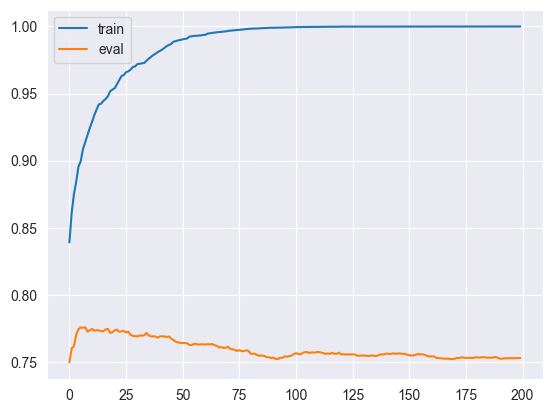

In [106]:
plt.plot(watch['train']['auc'], label = 'train')
plt.plot(watch['eval']['auc'], label = 'eval')
plt.legend()

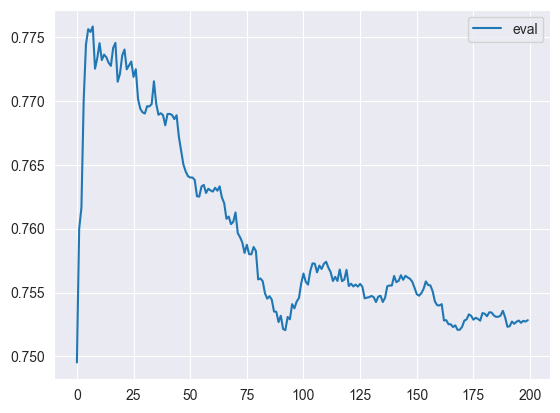

In [107]:
plt.plot(watch['eval']['auc'], label = 'eval')
plt.legend()

## 6.8 XGBoost Parameter Tuning
* *Tuning the **eta**, **max_depth**, and **min_child_weight** parameters*

In [147]:
scores = {}

In [156]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
watch = {}
model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 5, evals_result = watch, num_boost_round = 200)

[0]	train-auc:0.83894	eval-auc:0.74952
[5]	train-auc:0.85504	eval-auc:0.76362
[10]	train-auc:0.87102	eval-auc:0.76830
[15]	train-auc:0.87803	eval-auc:0.77013
[20]	train-auc:0.88549	eval-auc:0.77297
[25]	train-auc:0.89339	eval-auc:0.77437
[30]	train-auc:0.90019	eval-auc:0.77218
[35]	train-auc:0.90759	eval-auc:0.77270
[40]	train-auc:0.91276	eval-auc:0.77348
[45]	train-auc:0.91766	eval-auc:0.77648
[50]	train-auc:0.92194	eval-auc:0.77806
[55]	train-auc:0.92535	eval-auc:0.77855
[60]	train-auc:0.92906	eval-auc:0.77927
[65]	train-auc:0.93247	eval-auc:0.78012
[70]	train-auc:0.93532	eval-auc:0.78102
[75]	train-auc:0.93978	eval-auc:0.78216
[80]	train-auc:0.94248	eval-auc:0.78310
[85]	train-auc:0.94456	eval-auc:0.78359
[90]	train-auc:0.94660	eval-auc:0.78352
[95]	train-auc:0.94865	eval-auc:0.78299
[100]	train-auc:0.95044	eval-auc:0.78230
[105]	train-auc:0.95202	eval-auc:0.78309
[110]	train-auc:0.95345	eval-auc:0.78229
[115]	train-auc:0.95462	eval-auc:0.78293
[120]	train-auc:0.95626	eval-auc:0.782

In [157]:
key = 'eta=%s' % (xgb_params['eta'])

def parse_xgb_output(output):
    cols = ['train_auc','eval_auc']
    df_results = pd.DataFrame(np.array([output['train']['auc'],output['eval']['auc']])).transpose()
    df_results.columns = cols
    return df_results

scores[key] = parse_xgb_output(watch)
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=1.0', 'eta=0.3', 'eta=0.05'])

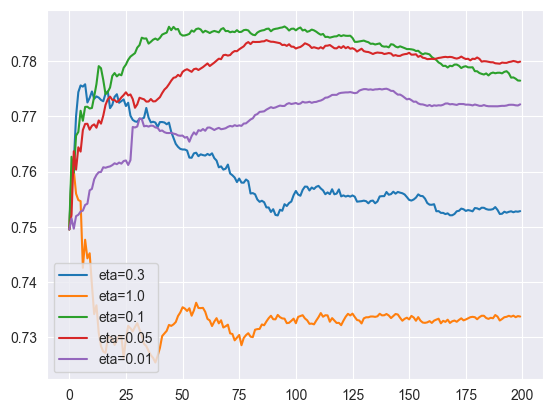

In [141]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.legend()

In [162]:
# eta = 0.1 is the best setting.  move on to max_depth
scores = {}
for d in [3, 4, 6, 10]:
    xgb_params = {
        'eta': 0.1,
        'max_depth': d,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
    watch = {}
    model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 5, evals_result = watch, num_boost_round = 200)
    key = 'max_depth=%s' % (xgb_params['max_depth'])
    scores[key] = parse_xgb_output(watch)
    scores.keys()

[0]	train-auc:0.77186	eval-auc:0.71556
[5]	train-auc:0.80067	eval-auc:0.74194
[10]	train-auc:0.82257	eval-auc:0.75655
[15]	train-auc:0.83186	eval-auc:0.76658
[20]	train-auc:0.84077	eval-auc:0.77463
[25]	train-auc:0.84522	eval-auc:0.78067
[30]	train-auc:0.84988	eval-auc:0.78311
[35]	train-auc:0.85443	eval-auc:0.78683
[40]	train-auc:0.85773	eval-auc:0.78846
[45]	train-auc:0.86084	eval-auc:0.78971
[50]	train-auc:0.86431	eval-auc:0.79131
[55]	train-auc:0.86749	eval-auc:0.79222
[60]	train-auc:0.87022	eval-auc:0.79169
[65]	train-auc:0.87300	eval-auc:0.79284
[70]	train-auc:0.87543	eval-auc:0.79451
[75]	train-auc:0.87767	eval-auc:0.79499
[80]	train-auc:0.87960	eval-auc:0.79415
[85]	train-auc:0.88183	eval-auc:0.79490
[90]	train-auc:0.88353	eval-auc:0.79539
[95]	train-auc:0.88524	eval-auc:0.79415
[100]	train-auc:0.88694	eval-auc:0.79481
[105]	train-auc:0.88805	eval-auc:0.79510
[110]	train-auc:0.88923	eval-auc:0.79554
[115]	train-auc:0.89121	eval-auc:0.79654
[120]	train-auc:0.89346	eval-auc:0.796

In [163]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

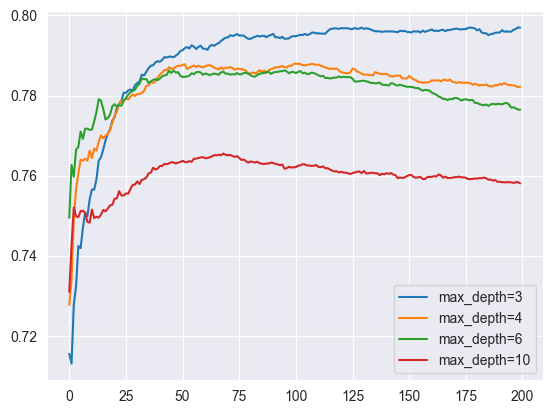

In [164]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.legend()

In [165]:
# max_depth = 10 is clearly not helping, here are some example functions to assist in zooming in
del scores['max_depth=10']

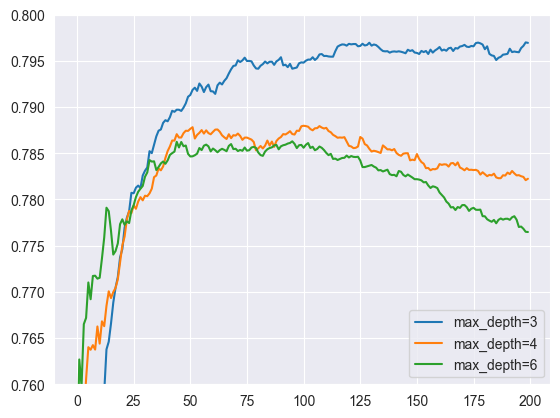

In [166]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.ylim(.76,.80)
plt.legend()

In [167]:
#max_depth = 3 is the best.  moving on to min_child_weight
scores = {}
for d in [1, 10, 30]:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': d,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
    watch = {}
    model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 5, evals_result = watch, num_boost_round = 200)
    key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
    scores[key] = parse_xgb_output(watch)

[0]	train-auc:0.77186	eval-auc:0.71556
[5]	train-auc:0.80067	eval-auc:0.74194
[10]	train-auc:0.82257	eval-auc:0.75655
[15]	train-auc:0.83186	eval-auc:0.76658
[20]	train-auc:0.84077	eval-auc:0.77463
[25]	train-auc:0.84522	eval-auc:0.78067
[30]	train-auc:0.84988	eval-auc:0.78311
[35]	train-auc:0.85443	eval-auc:0.78683
[40]	train-auc:0.85773	eval-auc:0.78846
[45]	train-auc:0.86084	eval-auc:0.78971
[50]	train-auc:0.86431	eval-auc:0.79131
[55]	train-auc:0.86749	eval-auc:0.79222
[60]	train-auc:0.87022	eval-auc:0.79169
[65]	train-auc:0.87300	eval-auc:0.79284
[70]	train-auc:0.87543	eval-auc:0.79451
[75]	train-auc:0.87767	eval-auc:0.79499
[80]	train-auc:0.87960	eval-auc:0.79415
[85]	train-auc:0.88183	eval-auc:0.79490
[90]	train-auc:0.88353	eval-auc:0.79539
[95]	train-auc:0.88524	eval-auc:0.79415
[100]	train-auc:0.88694	eval-auc:0.79481
[105]	train-auc:0.88805	eval-auc:0.79510
[110]	train-auc:0.88923	eval-auc:0.79554
[115]	train-auc:0.89121	eval-auc:0.79654
[120]	train-auc:0.89346	eval-auc:0.796

In [168]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

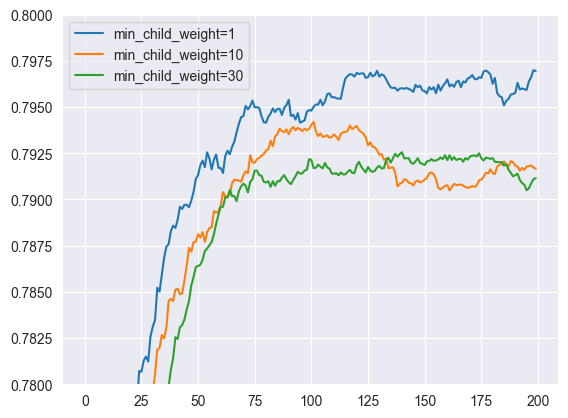

In [170]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.ylim(.78, .80)
plt.legend()

In [172]:
# child weight of 1 (default) looks to be the best, although relatively negligible.  go ahead and finalize model with those parameters,
# noting also that number of iterations ~125 looks to be where the model roughly stagnates in terms of performance
xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
watch = {}
model = xgb.train(xgb_params,dtrain, num_boost_round = 125)

In [173]:
#other useful parameters = subsample, colsample_bytree - sets how much of the data is being grabbed/considered by the algorithms

## 6.9 Selecting the Final (best) Model
* *Choosing between decision trees, random forest, and XGBoost*

In [178]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=82)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


0.755585357583977

In [179]:
rf = RandomForestClassifier(n_estimators = 125, max_depth = 10, min_samples_leaf = min_samples_leaf, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


0.786173137003221

In [180]:
xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
model = xgb.train(xgb_params,dtrain, num_boost_round = 125)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)


0.7965809740621442

In [181]:
#OK, XGBoost is the best.  Now lets train using the full training dataset
df_full_train = df_full_train.reset_index(drop = True)
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no_rec,fixed,60,959.0,300000.0,30000.0,1000,1460
1,default,8,other,60,41,married,no_rec,freelance,45,959.0,300000.0,30000.0,1800,2101
2,ok,2,parents,36,19,married,no_rec,fixed,35,959.0,300000.0,30000.0,400,570
3,ok,1,owner,12,61,married,no_rec,others,45,959.0,300000.0,30000.0,300,650
4,ok,13,owner,60,27,married,no_rec,fixed,35,959.0,300000.0,30000.0,1060,1750


In [183]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train


array([0, 1, 0, ..., 0, 0, 1], shape=(3563,))

In [184]:
del df_full_train['status']

In [186]:
dicts_full_train = df_full_train.to_dict(orient = 'records')

In [187]:
dv = DictVectorizer(sparse=False)

In [188]:
X_full_train = dv.fit_transform(dicts_full_train)

In [189]:
dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [190]:
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names = list(dv.get_feature_names_out()))

In [193]:
xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
final_model = xgb.train(xgb_params,dfulltrain, num_boost_round = 125)
y_pred = final_model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.7974927911636771